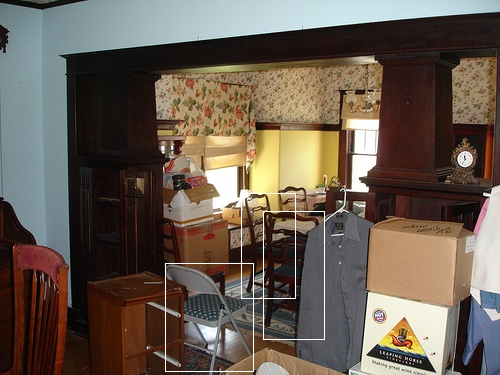

In [14]:
from PIL import ImageDraw
from IPython.display import display

from yolo.dataset import VOCDataset

root = "/home/mukesh/.cache/kagglehub/datasets/aladdinpersson/pascalvoc-yolo/versions/1"
csv_file = "train.csv"
dataset = VOCDataset(root, csv_file)
img, output = dataset.__getitem__(0)

draw = ImageDraw.Draw(img)
img_width, img_height = img.size

for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        cell = output[i, j]

        obj_exists = cell[20]

        if obj_exists:
            x = float(cell[21]) * img_width
            y = float(cell[22]) * img_height
            w = float(cell[23]) * img_width
            h = float(cell[24]) * img_height

            x1 = x - 0.5 * w
            y1 = y - 0.5 * h

            x2 = x + 0.5 * w
            y2 = y + 0.5 * h

            draw.rectangle((x1, y1, x2, y2))

display(img)